<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-with-pytorch-step-by-step/01_visualizing_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Visualizing Gradient Descent

If you really understand how gradient descent works, you will also understand how
the characteristics of your data and your choice of hyper-parameters (mini-batch
size and learning rate, for instance) have an impact on how well and how fast the
model training is going to be.

I mean visualizing the effects of different
settings, I mean telling a story to illustrate the concept. That’s how you develop
intuition.

That being said, I’ll cover the five basic steps you’d need to go through to use
gradient descent. I’ll show you the corresponding Numpy code while explaining lots
of fundamental concepts along the way.

##Setup

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter0()
# This is needed to render the plots in this chapter
from plots.chapter0 import *

Finished!


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [14]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

##Model

The model must be simple and familiar, so you can focus on the inner workings of gradient descent.

So, I will stick with a model as simple as it can be: a linear regression with a single
feature x!

$$
\Large y = b + w x + \epsilon
$$

##Data Generation

In order to generate synthetic data for it, we need to
pick values for its `parameters`. I chose `b = 1` and `w = 2`.

First, let’s generate our `feature (x)`: we use Numpy's `rand` method to randomly
generate `100 (N)` points between 0 and 1.

Then, we plug our `feature(x)` and our parameters b and w into our equation to
compute our `labels(y)`. But we need to add some Gaussian noise (epsilon) as well;otherwise, our synthetic dataset would be a perfectly straight line.



In [3]:
np.random.seed(42)

true_b = 1
true_w = 2
N = 100

# Data Generation
x = np.random.rand(N, 1)
print(f"X shape: {x.shape}")
epsilon = (.1 * np.random.randn(N, 1))

# estimate y
y = true_b + true_w * x + epsilon

X shape: (100, 1)


Let's split data into train and validation set.

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[: int(.8 * N)]
# Uses the remaining indices for validation
val_idx = idx[int(.8 * N): ]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

print(x_train.shape, x_val.shape)

(80, 1) (20, 1)


(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f7439dd0>,
       dtype=object))

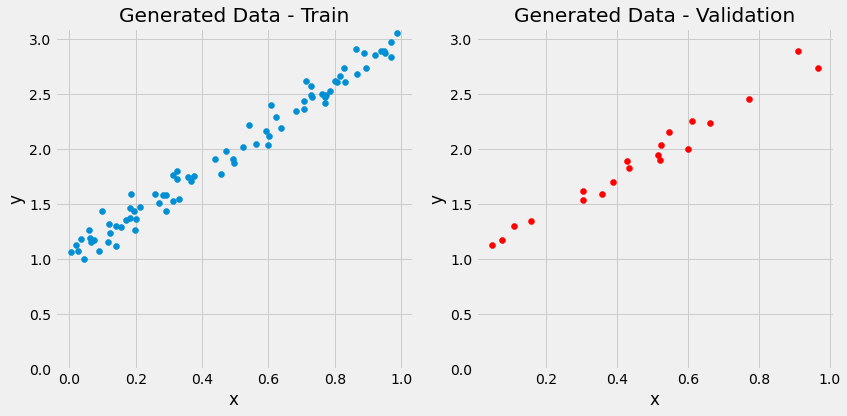

In [5]:
# let's plot the training and validation set
figure1(x_train, y_train, x_val, y_val)

We know that b = 1, w = 2, but now let’s see how close we can get to the true
values by using gradient descent and the 80 points in the training set (for training,
N = 80).

##Step 0: Random Initialization

In our example, we already know the true values of the parameters, but this will
obviously never happen in real life: if we knew the true values, why even bother to
train a model to find them?!

OK, given that we’ll never know the true values of the parameters, we need to set
initial values for them. 

How do we choose them? 

It turns out; a random guess is as
good as any other.

For training a model, you need to randomly initialize the parameters/weights.

In [6]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)

b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


##Step 1: Compute Model’s Predictions

This is the forward pass - it simply computes the model’s predictions using the current
values of the parameters/weights. 

At the very beginning, we will be producing really
bad predictions.

In [7]:
# Step 1 - Computes our model's predicted output - forward pass
y_hat = b + w * x_train

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb6ec62e050>)

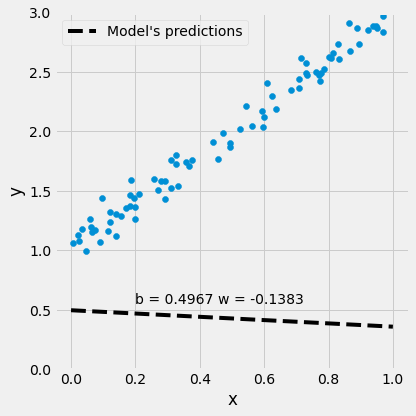

In [8]:
figure2(x_train, y_train, b, w)

##Step 2: Compute the Loss

There is a subtle but fundamental difference between error and loss.

The error is the difference between the actual value (label) and the predicted
value computed for a single data point.

So, for a given `i-th` point (from our dataset
of `N` points), its error is:

$$error_i = \hat y_i - y_i$$

The error of the first point in our dataset (`i = 0`) can be represented like this:

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb6ec0a0150>)

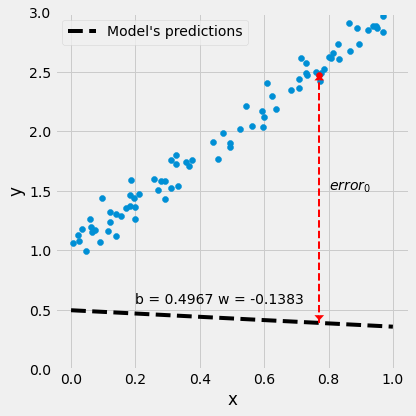

In [15]:
figure3(x_train, y_train, b, w)

The loss, on the other hand, is some sort of aggregation of errors for a set of data
points.

It seems rather obvious to compute the loss for all (N) data points, right?

Although it will surely yield a more stable path from the initial random
parameters to the parameters that minimize the loss, it will also surely be slow.

For a regression problem, the loss is given by the Mean Squared Error (MSE), that
is, the average of all squared errors, that is, the average of all squared differences
between labels (`y`) and predictions (`b + wx`).

$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

Here, we are using all data points of the training set to compute the
loss, so `n = N = 80`, meaning we are indeed performing batch gradient descent.

In [16]:
# Step 2 - Computing the loss

# We are using ALL data points, so this is BATCH gradient descent. How wrong is our model? That's the error!
error = (y_hat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


###Loss surface